# MAGNET

MAGNET is a Medial Axis Generated Network ExtracTion and, as the name suggests, depends on the medial axis or skeleton of the pore space. Pores are inserted at junctions and endpoints located on the skeleton followed by a search for local maximums to locate pores along long throats. In this example script, we demonstrate how to extract a network from a simple 2D image of blobs using MAGNET.

In [1]:
import matplotlib.pyplot as plt
import porespy as ps
import openpnm as op
import numpy as np
ps.visualization.set_mpl_style()
np.random.seed(10)

First, a test image of blobs is generated that is 100 by 100 pixels in size.

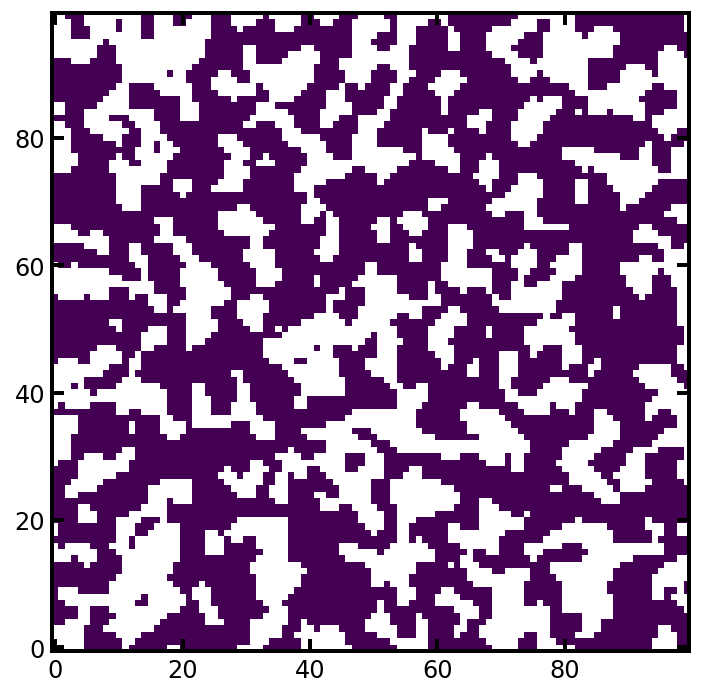

In [2]:
im = ps.generators.blobs([100, 100], porosity=0.6, blobiness=2)
fig, ax = plt.subplots(figsize=[5, 5])
ax.imshow(1/im, origin='lower');

Next, MAGNET is run on the test image to extract a network. MAGNET returns a dictionary containing the pore coordinates and throat connections of the extracted network as well as the skeleton of the pore space. Padding can be added to the image prior to taking the skeleton to help coerce the skeleton to the edge of the image for help determining boundary pores. Different amounts of padding were tried including no padding and 20 pixels of padding.  In the case of no padding, a boundary width of 3 pixels from the edge of the image can be used to help locate pores centred within three pixels from the edge of the image. The results of both are shown below where the skeleton is overlayed onto the image in yellow. 

In [3]:
net1, sk1 = ps.filters.magnet(im, padding=None, boundary_width=3)
net2, sk2 = ps.filters.magnet(im, padding=20, boundary_width=0)

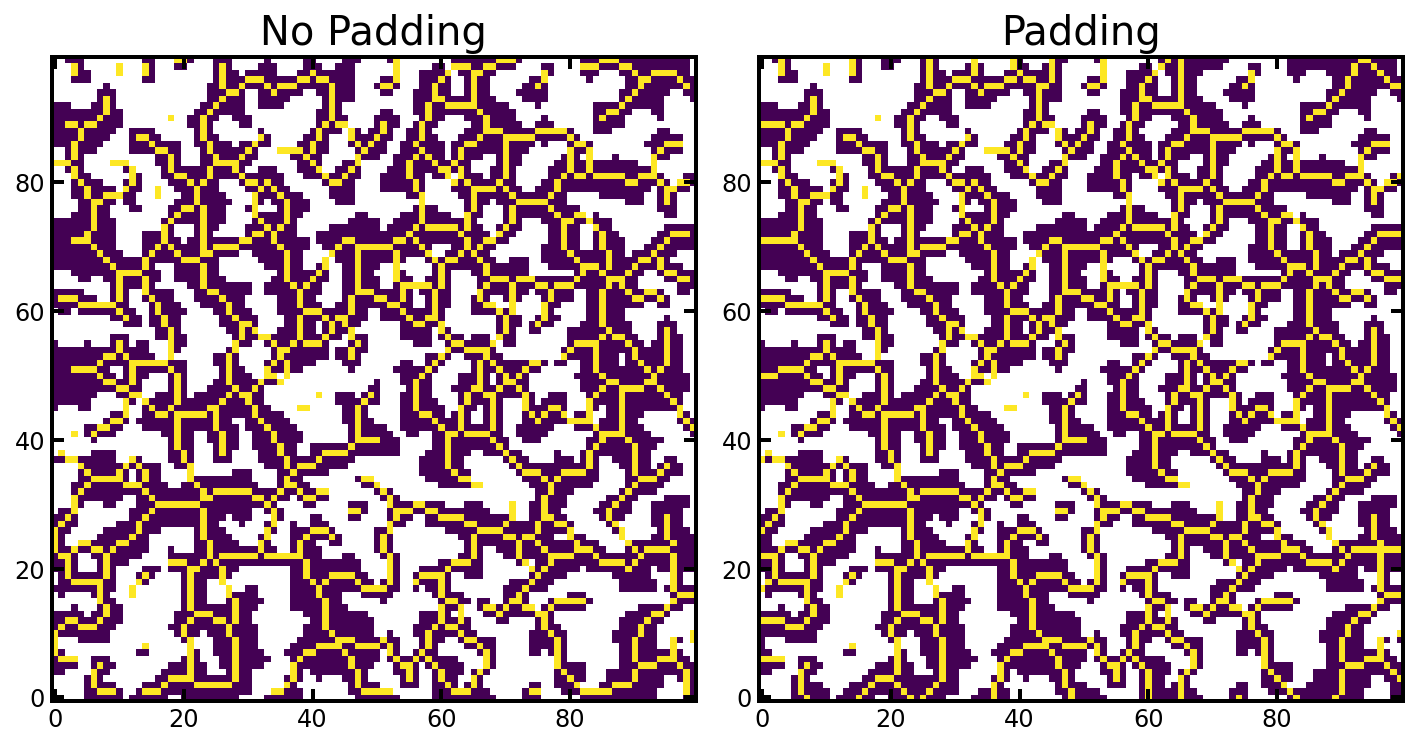

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[10, 10])
ax[0].imshow(1/im*1 + sk1*2, origin='lower')
ax[0].set_title('No Padding', fontsize=20)
ax[1].imshow(1/im*1 + sk2*2, origin='lower')
ax[1].set_title('Padding', fontsize=20);

The dictionary containing all network properties is converted to a network object in `OpenPNM` using the `network_from_porespy` function. Pore and throat diameters are found by multiplying the pore and throat radius, returned from MAGNET, by a factor of 2.

In [5]:
net2 = op.io.network_from_porespy(net2)
net2['pore.diameter'] = net2['pore.radius']*2
net2['throat.diameter'] = net2['throat.radius']*2

Finally, the resulting network is overlayed on the original image for visualization. The pores in red are the boundary pores found by padding the image prior to skeletonization.

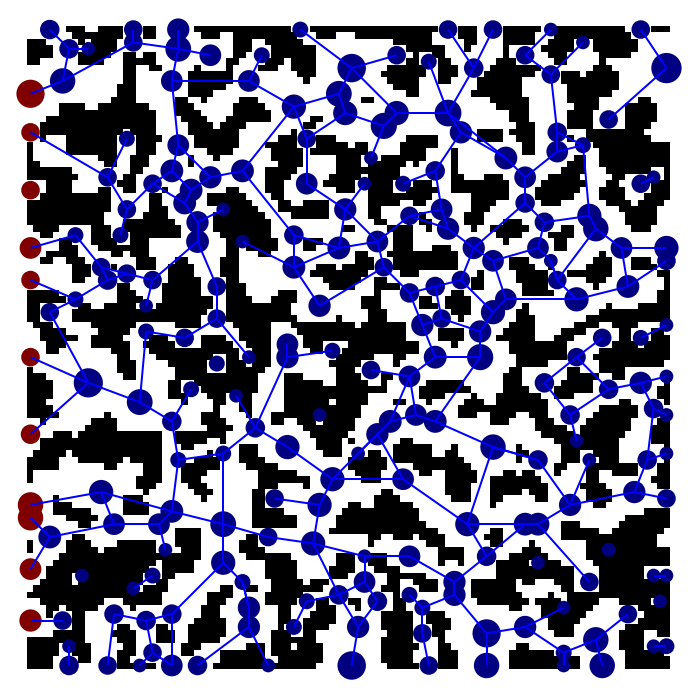

In [6]:
fig, ax = plt.subplots(figsize=[5, 5]);
slice_m = im.T
ax.imshow(slice_m, cmap=plt.cm.bone)
op.visualization.plot_coordinates(ax=fig,
                                  network=net2,
                                  size_by=net2["pore.diameter"],
                                  color_by=net2["pore.xmin"],
                                  markersize=200)
op.visualization.plot_connections(network=net2, ax=fig)
ax.axis("off");